In [ ]:
# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset

In [2]:
df = pd.read_csv('train.csv')

In [ ]:
# Extracting the top 10 data

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Calculating the number of rows (total number of passengers) and columns (information columns)

In [4]:
df.shape

(891, 12)

In [ ]:
# Calculating the total number of null values in each columns if any

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Adding a new column named 'Familysize' to the given dataset as 'SibSp' and 'Parch' are family members

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
# Adding one more new column named 'Alone' to the dataset as a person is travelling alone or with family members

In [16]:
df['Alone']=[0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [ ]:
# Dropping the columns 'PassengerId','Name','SibSp','Parch','Ticket','Cabin', and 'familySize' as they seems useless for now

In [25]:
data = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','FamilySize'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [ ]:
# Calculating the mean of the remaining columns

In [26]:
data.mean()

Survived     0.383838
Pclass       2.308642
Age         29.699118
Fare        32.204208
Alone        0.602694
dtype: float64

In [ ]:
# Filling the mean value of age into the null spaces of age column

In [34]:
data.fillna(data.mean(),inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [ ]:
# Again, calculating the total number of null values in each columns if any

In [35]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
Alone       0
dtype: int64

In [ ]:
# Counting the frequency of each value in Embarked column as it has two null spaces

In [37]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# As 'S' appears 646 times in Embarked column, so inserting 'S' into two null spaces as it'll have negligible affect on the data

In [39]:
data['Embarked'].fillna('S',inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [ ]:
# Again, calculating the total number of null values in each columns if any

In [40]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Alone       0
dtype: int64

In [ ]:
# As there are no null value in the dataset, so now, we can analyze and visualize the data

In [ ]:
# Calculating the total number of survivors

In [43]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# Plotting a countplot for the Survivors keeping 'Sex' as a hue variable

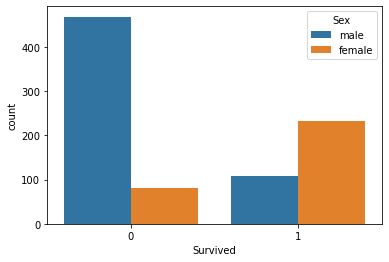

In [52]:
sns.countplot(x='Survived',hue='Sex',data=data)
plt.show()

In [ ]:
# From the above plot, it can be concluded that 'Survival rate of female passengers was more than male passengers'.

In [ ]:
# Plotting a countplot for the Survivors keeping 'Alone' as a hue variable

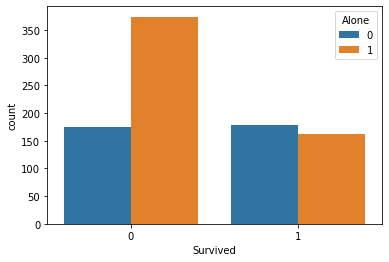

In [54]:
sns.countplot(x='Survived',hue='Alone',data=data)
plt.show()

In [ ]:
# From the above plot, it can be concluded that 'Survival rate was higher for passengers who were with their families'.

In [ ]:
# Plotting a countplot for the Survivors keeping 'Pclass' as a hue variable

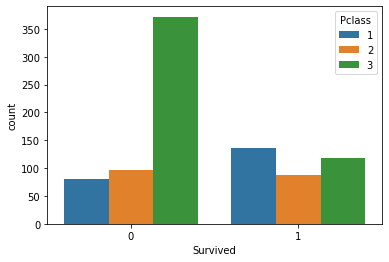

In [55]:
sns.countplot(x='Survived',hue='Pclass',data=data)
plt.show()

In [ ]:
# From the above plot, it can be concluded that 'Survival rate was higher for passengers who were travelling in first class'.

In [ ]:
# Plotting a countplot for the Survivors keeping 'Embarked' as a hue variable

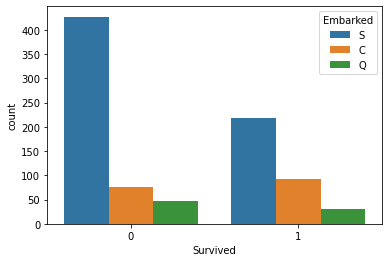

In [56]:
sns.countplot(x='Survived',hue='Embarked',data=data)
plt.show()

In [ ]:
# From the above plot, it can be concluded that 'Survival rate was higher for passengers who borded at 'Cherbourg'.

In [ ]:
# Plotting a barplot between 'Survived' and 'Fare'

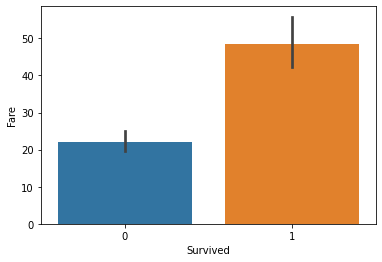

In [59]:
sns.barplot(x='Survived',y='Fare',data=data)
plt.show()

In [ ]:
# From the above plot, it can be concluded that 'Survival rates were higher for passengers paying higher fares'.

In [ ]:
# CONCLUSION -

# 'Female passengers were prioritized over male passengers.'

# 'Survival rate was higher for passengers who were with their families.'

# 'Survival rate was higher for passengers who borded at Cherbourg.'

# 'Survival rate was higher for passengers who were travelling in first class (who paid higher fare, or can say who were rich).'